In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, norm, chi2

## Q4(ii)

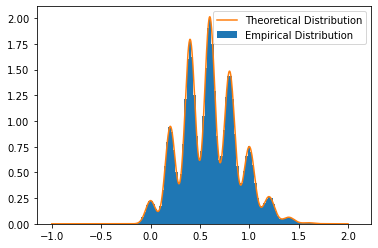

In [2]:
n = 10
p = 0.3
a = 0.2
sigma = 0.01
s = 0.05

m = int(1e6)

V = np.random.normal(0, s, size=(m,))
V += np.sum((np.random.rand(n, m) < p) * np.random.normal(a, sigma, size=(n, m)), axis=0)

fig, ax = plt.subplots()
ax.hist(V, label="Empirical Distribution", density=True, bins=100)

P_V = 0
for K in range(n+1):
    P_V += norm.pdf(np.linspace(-1, 2, 1000), loc=K * a, scale=np.sqrt(K*sigma**2 + s**2)) * binom.pmf(K, n, p)
ax.plot(np.linspace(-1, 2, 1000), P_V, label="Theoretical Distribution")
ax.legend()

## Q6

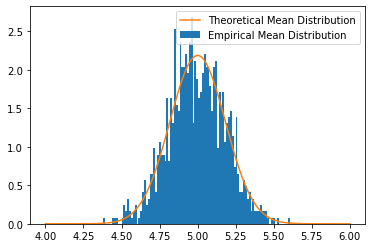

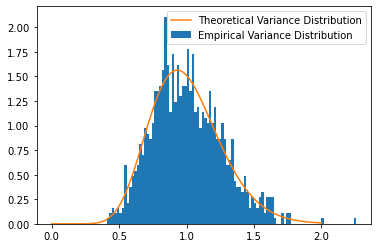

In [9]:
n = 30
mu = 5
sigma = 1

m = 1000

X = np.random.normal(mu, sigma, size=(n, m))
means = np.mean(X, axis=0)
variances = np.sum((X - means) ** 2, axis=0) / (n-1)

fig, ax = plt.subplots()
ax.hist(means, label="Empirical Mean Distribution", density=True, bins=100)

# Central Limit Theorem gives us the distribution of the means
P_means = norm.pdf(np.linspace(4, 6, 1000), loc=mu, scale=np.sqrt(sigma**2 / n))
ax.plot(np.linspace(4, 6, 1000), P_means, label="Theoretical Mean Distribution")
ax.legend()

fig, ax = plt.subplots()
ax.hist(variances, label="Empirical Variance Distribution", density=True, bins=100)

# Variance can be boiled down to chi squared distribution, but we need to do an inverse transform of things
P_variances = chi2.pdf(np.linspace(0, 2 * (n - 1) / sigma ** 2, 100), n-1)
ax.plot(np.linspace(0, 2, 100), P_variances * (n - 1) * sigma ** 2, label="Theoretical Variance Distribution")
ax.legend()

## Q7

In [4]:
a = np.array([65, 73, 51, 67, 48, 80, 69, 83, 89, 62, 71, 67, 64, 78, 85, 49, 80, 60, 51, 70])
b = np.array([63, 72, 47, 63, 44, 78, 67, 52, 54, 58, 68, 65, 63, 77, 62, 46, 78, 56, 49, 65])

n_a = a.shape[0]
n_b = b.shape[0]

a_mean = np.mean(a)
b_mean = np.mean(b)

a_var = n / (n - 1) * np.var(a)
b_var = n / (n - 1) * np.var(b)

Z = (a_mean - b_mean) / np.sqrt((a_var / n_a + b_var / n_b))
print("Calculated Z statistic: ", Z)

p = 1 - norm.cdf(Z) + norm.cdf(-Z)
print("Calculated P Value (2 Tailed): ", p)

Calculated Z statistic:  1.8868698069325487
Calculated P Value (2 Tailed):  0.05917783903576096


Hence, we would reject the null hypothesis at the 10% significance, but we would fail to reject the null hypothesis at the 5% signficiance level.

For this dataset, there are only around 20 samples. This is a bit less than is suitable for a 2 tailed Z test. A 2 tailed t-test with the student's t distribution (with 19 degrees of freedom) would be more suitable.

## Q8

In [18]:
n = 100
p = 0.7

X = np.random.randn(n) < p
print(X)

[ True  True False False  True  True  True  True  True  True  True False
  True False  True  True  True  True  True  True  True False  True  True
  True False  True  True  True False  True  True  True  True  True False
 False  True  True  True  True  True False  True False  True  True  True
  True  True  True  True  True  True False  True  True  True False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True  True False False
 False  True  True  True]


Clearly, the likelihood of getting a single head is $p$ and a single tail is $(1 - p)$. Hence the likelihood of getting an exact sequence with $k = \sum^n_{i=1} X_i$ heads and $n - k$ tails is $p^k (1 - p)^{n - k}$  

By Bayes rule, the posterior $$P(p | X) = \frac{P(X | p) P(p)}{P(X)}$$  

For a uniform prior, $P(p) = 1$. Hence $P(p | X) \propto p^k (1 - p)^{n - k}$  

For the prior $P(p) \propto (1 - p^4)$, $ P(p | X) \propto p^{k + 1} (1 - p)^{n - k} (1 - p^4)$

We can work out the normalising coefficient later with some numerical integration (since these priors are certainly not conjugate as the conjugate prior is a Beta distribution).

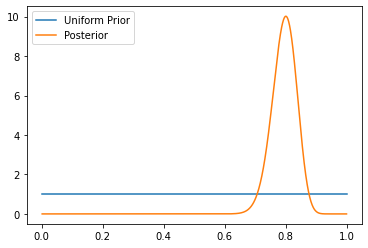

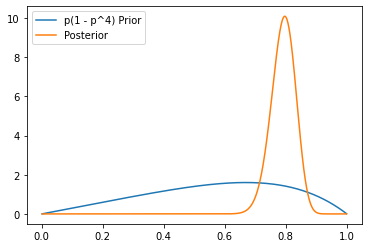

In [19]:
k = np.sum(X)

dp = 1/1000
p_space = np.linspace(dp, 1 - dp, 1000)

# We'll do things in log space for numerical stability's sake
log_likelihood = lambda p: k * np.log(p) + (n - k) * np.log(1 - p)

# For a uniform prior, the posterior and the prior have the same distribution
# Since the prior has density 1 everywhere
posterior = np.exp(log_likelihood(p_space))

# numerical integration via trapezium rule
norm_posterior = np.sum(0.5 * dp * (posterior[1:] + posterior[:-1]))

posterior = np.exp(np.log(posterior) - np.log(norm_posterior))

fig, ax = plt.subplots()
ax.plot(p_space, np.ones(p_space.shape), label='Uniform Prior')
ax.plot(p_space, posterior, label='Posterior')
plt.legend()

# For prior proportional to p (1 - p^4)
# We'll stay in log space again to keep things numerically stable
log_prior = np.log(p_space) + np.log(1 - p_space**4)
posterior = np.exp(log_likelihood(p_space) + log_prior)

# numerical integration via trapezium rule
norm_posterior = np.sum(0.5 * dp * (posterior[1:] + posterior[:-1]))
posterior = np.exp(np.log(posterior) - np.log(norm_posterior))

prior = np.exp(log_prior)
norm_prior = np.sum(0.5 * dp * (prior[1:] + prior[:-1]))
prior = np.exp(log_prior - np.log(norm_prior))

fig, ax = plt.subplots()
ax.plot(p_space, prior, label='p(1 - p^4) Prior')
ax.plot(p_space, posterior, label='Posterior')
plt.legend()

The 90% credible interval can be found numerically by starting at the centre of the unimodal distrbution, and numerically integrating outwards until 90% is reached. This obtains the 90% central credible interval.

Alternatively, the highest density credible interval can be computed by integrating numerically the probability mass above a given threshold, and then moving the threshold down until 90% of the probability mass is obtained.

The integration can be done in a number of different ways, though my preferred method is the trapezium rule as a fast and accurate way of integrating.